## Chapter 4: [Spectroscopy](CH4-Spectroscopy.ipynb)

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of Spectrum Images - Core-Loss


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes



## Content

Plotting, Interacting and Quantifying Spectrum Image data

Please cite for core-loss quantification:

[M. Tian et  al. *Measuring the areal density of nanomaterials by electron energy-loss spectroscopy*
Ultramicroscopy Volume 196, 2019, pages 154-160](https://doi.org/10.1016/j.ultramic.2018.10.009)

as a reference of this quantification method.

## First we import the relevant packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

from scipy.ndimage.filters import gaussian_filter

# import pyTEMlib packages
import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library
import pyTEMlib.EELS_tools  as eels 

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
windows
pyTEM version:  0.10.2019.1


# Load and plot a spectrum

As an example we load the spectrum **1EELS Acquire (high-loss).dm3** from the *example data* folder.

Please see [Working with Spectrum Images](CH4-Working_with_Spectrum_Images.ipynb) for details on storage and plotting.

Channel_000 :  3-EELS Spectrum Image


Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


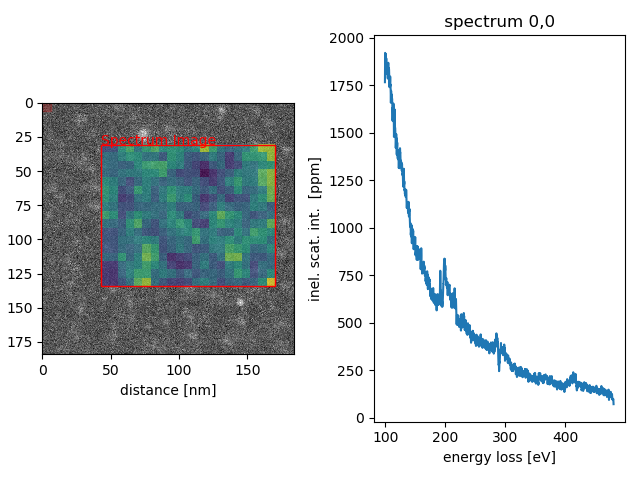

In [272]:
# If a file is open, close it
try:
    h5_file.close()
except:
    pass
# Load new file
h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
measurement_group = h5_file['Measurement_000']


for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')    
        
if current_channel['data_type'][()] == 'spectrum_image':
    SI_plot= eels.interactive_spectrum_image(current_channel, horizontal = True)
    
else:
    print('NOT what we want here, please select a spectrum image ')
    ft.h5_plot(current_channel)
   
    

## Add survey image to file
If you have not done so before, add the survey image to the dataset (measurement group).

In [273]:
SI_channel = ft.h5add_channels(h5_file,current_channel,'survey image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')   
        

Channel_000 :  3-EELS Spectrum Image
Channel_001 :  3SI Survey Image


## Add Z-contrast image
If you have not done so before, add the survey image to the dataset (measurement group).

In [274]:
Z_channel = ft.h5add_channels(h5_file,current_channel,'Z-contrast image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 

Channel_000 :  3-EELS Spectrum Image
Channel_001 :  3SI Survey Image
Channel_002 :  3Analog


## Add Ronchigram

In [275]:
Ronchi_channel = ft.h5_add_channels(h5_file,current_channel,'Ronchigram')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
for key in Ronchi_channel.attrs.keys():
    if 'Exposure Time (s)' in key:
        print(key, Ronchi_channel.attrs[key])
        if 'exposure_time_s' in Ronchi_channel:
            Ronchi_channel['exposure_time_s'][()] = Ronchi_channel.attrs[key]
        else:
            Ronchi_channel['exposure_time_s'] = Ronchi_channel.attrs[key]
print(Ronchi_channel['Raw_Data'][()].shape)
ronchi = np.array(Ronchi_channel['Raw_Data'][()], dtype= float)
print ('Counts/seconds: ', ronchi.sum()/Ronchi_channel['exposure_time_s'])
if 'counts_per_s' in Ronchi_channel:
    Ronchi_channel['counts_per_s'][()] = ronchi.sum()/Ronchi_channel['exposure_time_s']
else:
    Ronchi_channel['counts_per_s'] = ronchi.sum()/Ronchi_channel['exposure_time_s']
    
if 'incident_current_counts_per_s' in current_channel:
    current_channel['incident_current_counts_per_s'][()] = Ronchi_channel['counts_per_s']
else:
    current_channel['incident_current_counts_per_s'] = Ronchi_channel['counts_per_s']
Ronchi_channel['file_name']= Ronchi_channel['title'][()] 
Ronchi_channel['title'][()] = 'Ronchigram'      

for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 
        
      

original_metadata.root.ImageList.1.ImageTags.DataBar.Exposure Time (s) 0.5
(4194304, 1)
Counts/seconds:  32939792374.0
Channel_000 :  3-EELS Spectrum Image
Channel_001 :  3SI Survey Image
Channel_002 :  3Analog
Channel_003 :  Ronchigram


In [248]:
del h5_file['Measurement_000/Channel_003']

## Add Survey Image to plot above



In [276]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_data() 

## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


## Overlay Z-contrast image on survey image at plot above

In [4]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


In [143]:
SI_plot.set_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])

In [211]:
print(tags['spectra']['0-0'].keys())

dict_keys(['spectrum', 'energy_scale', 'intensity_scale', 'edges', 'do_All', 'intentsity_scale'])


## Prepare Quantification

Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


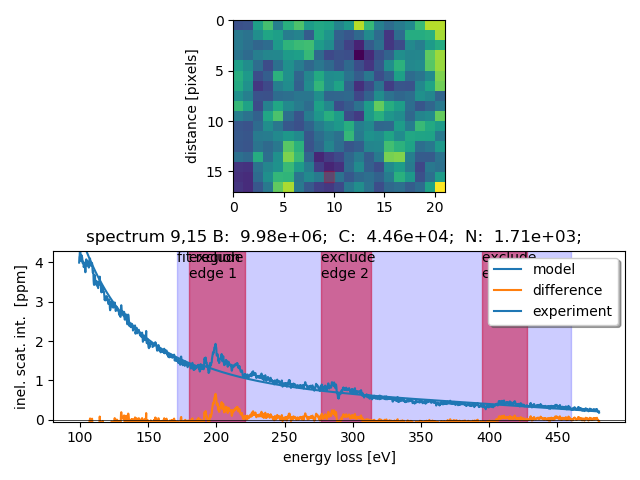

In [277]:
if 'incident_current_counts_per_s' in current_channel:
    SI_plot.tags['intentsity_scale_ppm'] =  1./(current_channel['incident_current_counts_per_s'][()]*SI_plot.tags['exposure_spectrum']) *1e6
for key in SI_plot.tags['spectra']:
    SI_plot.tags['spectra'][key]['intensity_scale']= SI_plot.tags['intentsity_scale_ppm'] 
    
tags = SI_plot.tags.copy()
SI_plot2= eels.interactive_spectrum_image(tags, horizontal = False)

# Set edges to be fitted
edges_present = ['B-K','C-K', 'N-K1']
SI_plot2.tags['edges_present'] = edges_present

## ACTIVATE THE FITTING
#SI_plot.analysis= 'fit_quantification'
#SI_plot2.set_legend(False)    

## Activate the regions selection tool.

In [278]:
## define the fitting regions
edges = eels.make_edges(edges_present, tags['energy_scale'], tags['acceleration_voltage'], tags['collection_angle'])

regions = eels.Region_Selector(SI_plot2.ax2)
for key in edges:
    regions.set_regions(str(key),edges[key]['onset']-edges[key]['start_exclude'], edges[key]['start_exclude']+edges[key]['end_exclude'])                               
regions.set_regions('fit region',tags['energy_scale'][100], tags['energy_scale'][-1]-tags['energy_scale'][100])


## After adjusting the regions, remove the selector and make legend visible

In [279]:
SI_plot2.set_legend(True)
region_tags = regions.get_regions()
SI_plot2.tags['region_tags'] = region_tags
tags2 = SI_plot2.tags.copy()
try:
    regions.disconnect()
    del regions
except:
    pass

## You can  adjust the previous selections 

In [ ]:
try:
    region_tags = regions.get_regions()
    regions.disconnect()
    del regions
except:
    pass

regions = eels.Region_Selector(SI_plot2.ax2)
print(region_tags['1'].keys())
for key in region_tags:
    regions.set_regions(str(key),region_tags[key]['start_x'], region_tags[key]['width_x'])                               


The result of the selected spectrum can be seen here

In [280]:
x = SI_plot2.x
y = SI_plot2.y

print('spectrum ', x,y)
if 'edges' not in SI_plot2.tags['spectra'][f'{x}-{y}']:
    SI_plot2.fit_quatification()
spectrum_dictionary = SI_plot2.tags['spectra'][f'{x}-{y}']['edges']
for key in  spectrum_dictionary: 
    if key.isdigit():  # only edges have numbers in that dictionary
        
        element = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        areal_density = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['areal_density']
        areal_density = areal_density * SI_plot2.tags['spectra'][f'{x}-{y}']['intensity_scale']/1e2
        monolayer = 18.2
        print(f'{element:2}: {areal_density:.1f} atoms = {areal_density/monolayer:.1f} monolayer')
       

spectrum  7 10
B : 90.9 atoms = 5.0 monolayer
C : 0.0 atoms = 0.0 monolayer
N : 0.9 atoms = 0.1 monolayer


## Whole Spectrum Image Analysis

Now we do the all the spectra, with the same setting as selected above. 
Set the verbose variable to **True** to see the progress.

In [281]:
SI_plot2.do_All(verbose = False)

## Plotting the results:

The results are in the individual spectrum dictionary: 

*SI_plot2.tags['spectra'][f'{x}-{y}']*

The compositional results are in the edge dictionary. Each edge has its own sub-dictionary. The areal_density is the result of the compositional fit. 

So we collect the areal densities of the different edges in numpy arrays.

The arrays are stored in a dictionary *results_dictionary* and then we plot those arrays.



<IPython.core.display.Javascript object>


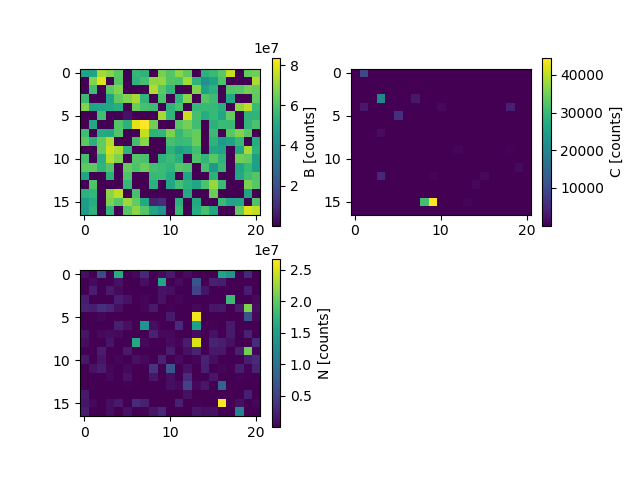

In [282]:
results_dictionary = {}

# we are only after the edges so it does not matter which spectrum we use
for key in  SI_plot2.tags['spectra']['0-0']['edges']: 
    
    if key.isdigit():  # only edges have numbers in that dictionary
        x = y = 0
        results_dictionary[key] = {} # make new dictionary
        # store the additional data like element and what edge
        results_dictionary[key]['element'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        results_dictionary[key]['Z'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['Z']
        results_dictionary[key]['onset'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['onset']
        results_dictionary[key]['symmetry'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['symmetry']
        
        # intitalize data array
        results_dictionary[key]['data'] = np.empty(SI_plot.tags['cube'].shape[0:2])
        # go through all spectra and fill data array pixel.
        for x in range(results_dictionary[key]['data'].shape[1]):
            for y in range(results_dictionary[key]['data'].shape[0]):
                
                results_dictionary[key]['data'][y,x] = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['areal_density']

## plot
ax = []; im= [];color_bar = []
fig = plt.figure()
titles = ['Ti [counts]', 'V [counts]', 'O [counts]', 'O/(Ti+V)  [rel.]',]
for key in results_dictionary:        
    ax.append(plt.subplot(2, 2, int(key)))
    im.append(ax[-1].imshow(results_dictionary[key]['data'], origin= 'upper'));
    color_bar.append(fig.colorbar(im[-1], ax=ax[-1]))
    color_bar[-1].set_label(results_dictionary[key]['element']+' [counts]')
#im[3].set_clim(vmax=8)

## With scale

dict_keys(['Z', 'symmetry', 'element', 'chemcial_shift', 'original_onset', 'onset', 'start_exclude', 'end_exclude', 'data', 'areal_density'])


<IPython.core.display.Javascript object>


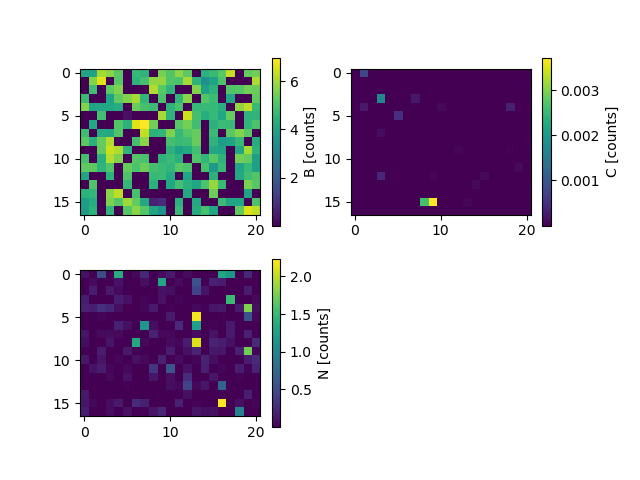

In [284]:
scale =  SI_plot2.tags['spectra'][f'{x}-{y}']['intensity_scale']/1e2 /monolayer

print(SI_plot2.tags['spectra'][f'{x}-{y}']['edges']['1'].keys())
## plot
ax = []; im= [];color_bar = []
fig = plt.figure()
titles = ['Ti [counts]', 'V [counts]', 'O [counts]', 'O/(Ti+V)  [rel.]',]
for key in results_dictionary:        
    ax.append(plt.subplot(2, 2, int(key)))
    im.append(ax[-1].imshow(results_dictionary[key]['data']*scale, origin= 'upper'));
    color_bar.append(fig.colorbar(im[-1], ax=ax[-1]))
    color_bar[-1].set_label(results_dictionary[key]['element']+' [counts]')
#im[0].set_clim(vmax=3)    
#im[2].set_clim(vmax=3)    

## Dictionary for Log of Fitting Results: Needs to be finished

In [244]:
out_tags = {}
for key1 in edges:
    if key1.isdigit():
        for key2 in edges[key1]:
            if key2 == 'data':
                out_tags[f"edge_{key1}_Xsection"] = edges[key1][key2]
            else:
                out_tags[f"edge_{key1}_{key2}"] = edges[key1][key2]
    else:
        print(key1)
        for key2 in edges[key1]:
            out_tags[f"{key1}_{key2}"] = edges[key1][key2]

out_tags['monolayer']= 18.2 #atoms/nm^2
out_tags['X_section_unit'] = 'atoms/nm$^2$'

for key in results_dictionary:
    name = results_dictionary[key]['element']+'_'+results_dictionary[key]['symmetry']
    out_tags[name+'_areal_density'] = results_dictionary[key]['data']
    out_tags[name+'_onset'] = results_dictionary[key]['onset']

    
for key in  SI_plot2.tags:
    if isinstance(SI_plot2.tags[key],dict):
        if key == 'spectra':
            name = 'spectrum'
            for key1 in SI_plot2.tags[key]:
                name1= name+'_'+key1
                for key2 in SI_plot2.tags[key][key1]:
                    
                    name2 = name1+'_'+key2
                    if key2 in ['edges']:
                        
                        for key3 in SI_plot2.tags[key][key1][key2]:
                            for key4 in SI_plot2.tags[key][key1][key2][key3]:
                                name3 = name2+'_'+key3+'_'+key4
                                out_tags[name3]= SI_plot2.tags[key][key1][key2][key3][key4]
                        
                        
                        
                    else:
                        out_tags[name2] = SI_plot2.tags[key][key1][key2]
        
        elif key =='region_':
                print('region')
        else:
            for key1 in SI_plot2.tags[key]:
                #print(key1)
                if isinstance(SI_plot2.tags[key][key1],dict):
                    #print('dict', key, key1, SI_plot2.tags[key][key1])
                    for key2 in SI_plot2.tags[key][key1]:
                        out_tags[key+'_'+key1+'_'+key2] = SI_plot2.tags[key][key1][key2]
                else:
                    print(' - ', key, key1, SI_plot2.tags[key][key1])
    else:
        #
        if key not in ['timestamp', 'title']:
            #out_tags[key]=SI_plot2.tags[key]
            #print(key)
            pass
        if 'edges_present' in SI_plot2.tags:
            #out_tags['edges_present']=SI_plot2.tags['edges_present']
            pass
    

## Log Results

In [243]:
log_group = ft.h5_add_Log(current_channel, name='Xsection_fit')
print (log_group)
ft.h5_add_Data2Log(log_group,  out_tags)



<HDF5 group "/Measurement_000/Channel_000/Log_000" (3 members)>


In [69]:
for key in  out_tags:
    if isinstance(out_tags[key],dict):
        print(key)

## Check on File Content

In [111]:
import pyUSID as usid 
#usid.hdf_utils.print_tree(h5_file)
for key in dict(current_channel['Log_004']).keys():
    if key in SI_plot2.tags:
        print(key)

title


# Close File
File needs to be closed to be used with other notebooks

In [271]:
h5_file.close()

## Back: [Calculating Dielectric Function II: Silicon](DielectricDFT2.ipynb)
## Next:  [ELNES](ELNES.ipynb)

## Chapter 4: [Spectroscopy](Spectroscopy.ipynb)
## Index: [Index](Analysis_of_Transmission_Electron_Microscope_Data.ipynb)